In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
movies = pd.read_csv("C:\\Users\\rtg90\Desktop\\ml-latest-small/movies.csv")
ratings = pd.read_csv("C:\\Users\\rtg90\Desktop\\ml-latest-small/ratings.csv")

# 1-a

In [343]:
movies_edit = movies.copy()
search1 = []
for value in movies['title']:
    init_index = value.find('(')
    if (value[init_index+1] in ['1','2','3','4','5','6','7','8','9','0']) and (len(value) == init_index+6):
        #print(len(value), " ", init_index, " ", init_index+5)
        yr = value[init_index+1:init_index+5]
    search1.append(yr)

movies_edit['year'] = search1

In [344]:
merged = pd.merge(movies_edit, ratings, on='movieId')

mclean = merged.fillna(value = '')
marray = mclean.genres.str.split('|')
m1NF = mclean.loc[mclean.index.repeat(marray.str.len())].assign(genres=np.concatenate(marray))
m1NF.reset_index(drop = True, inplace = True)

In [346]:
bygenre = m1NF.groupby(['year', 'genres']).count()[['rating']]

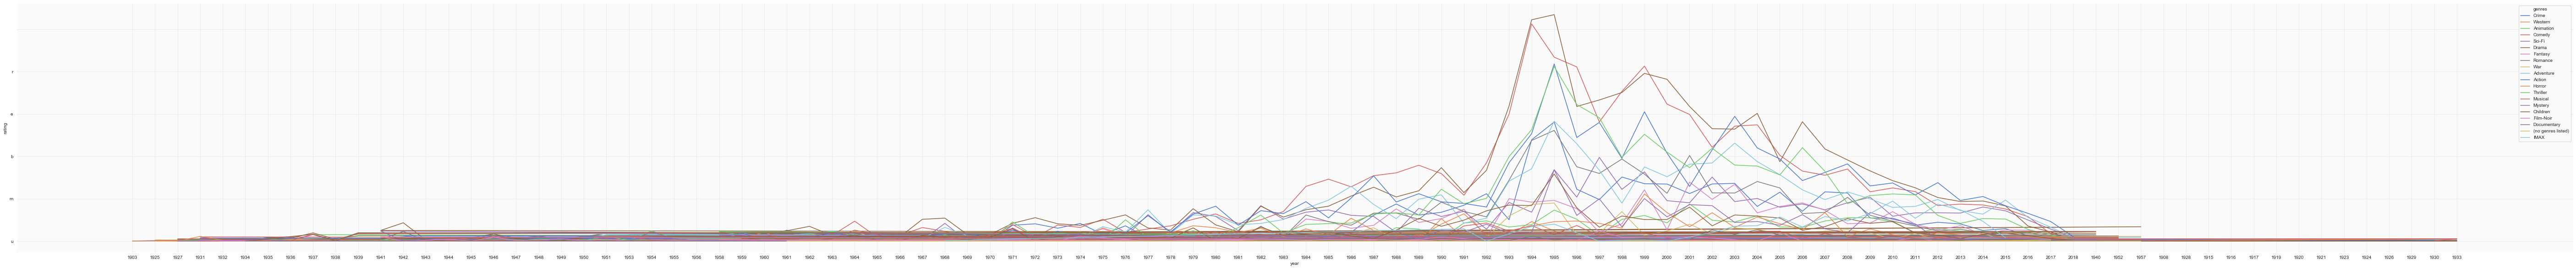

In [347]:
modified = bygenre.reset_index()
modified = modified.sort_values(by=['year'])
#modified = modified.dropna()
#modified.replace(0,np.nan).dropna(axis=1,how="all")


plt.figure(figsize=(100, 10))

#g = sns.catplot(x="year", y="rating", hue="genres", data=modified,
#                height=6, kind="bar", palette="muted")
g = sns.lineplot(x="year", y="rating", hue="genres", data=modified,
                palette="muted", sort = False)

#g.despine(left=True)
g.set_yticklabels("Number of reviews")
#g.set_xticklabels(rotation=90)

#ax.set(xlabel='year', ylabel='count')
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

To be honest, my plot doesn't seem to perform well. We have to consider that the movielens dataset that we are using is a lot more complex than the example dataset that the kaggle blog used because we have more genres than their content rating. If my lineplot gets a little bit more adjustment, it would be more digestible than the stacked bar plot because it would be able to compare which genre has more reviews in each year more easily. In other words, my lineplot makes it very convenient to compare which genre has more reviews in a given year because each line starts from the baseline of y = 0. In the example stacked bar plot, each content type starts from different y value (because it's stacked), so it is difficult to compare the number of reviews in a given year. More importantly, it is easier to see how the number of reviews for each genre changes over time; it is easier to see the trend. This feature is not really seen from the example stacked bar plot. 

# 1-b

<Figure size 2160x1440 with 0 Axes>

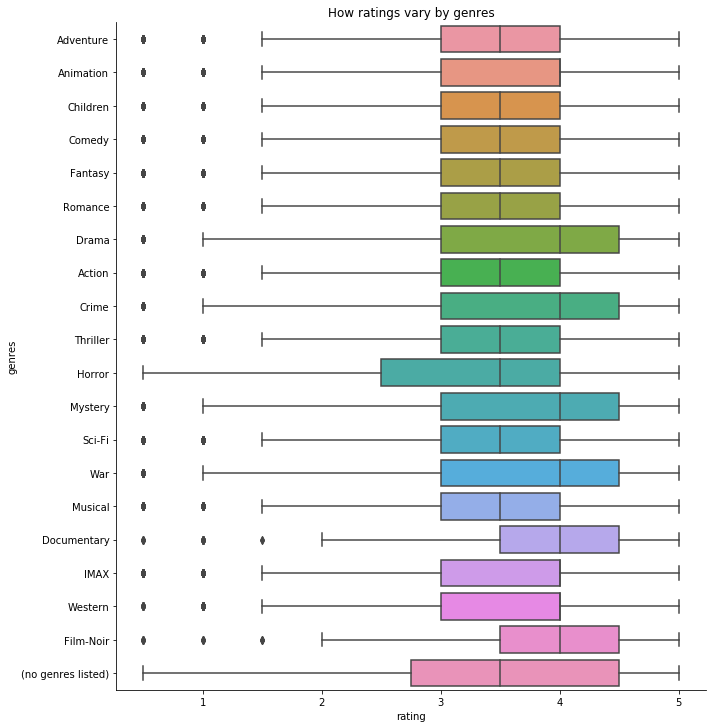

In [210]:
plt.figure(figsize=(30, 20))

genre_rating = m1NF[['genres','rating']]
#ax = sns.boxplot(y="genres", x = 'rating', orient = "h",  data=genre_rating)
ax = sns.catplot(x="rating", y="genres",data=genre_rating, kind="box",height=10)
plt.title("How ratings vary by genres")
plt.show()

I cleaned up the presentation of the plot by removing the legend. The legend in the example boxplot is unnecessary and redundant because we already know which box plot corresponds to which genre. The boxplot looks much simpler after getting rid of the legend. I also added a title to the plot to give a glimpse of what the plot shows. 

# 2

In [4]:
fandango = pd.read_csv("C:\\Users\\rtg90\Desktop\\fandango_scrape.csv")

In [119]:
'''
fandango_edit = fandango.copy()
search1 = []
for value in fandango['FILM']:
    init_index = value.find('(')
    if (value[init_index+1] in ['1','2','3','4','5','6','7','8','9','0']) and (len(value) == init_index+6):
        #print(len(value), " ", init_index, " ", init_index+5)
        yr = int(value[init_index+1:init_index+5])
    search1.append(yr)

fandango_edit['year'] = search1
'''

'\nfandango_edit = fandango.copy()\nsearch1 = []\nfor value in fandango[\'FILM\']:\n    init_index = value.find(\'(\')\n    if (value[init_index+1] in [\'1\',\'2\',\'3\',\'4\',\'5\',\'6\',\'7\',\'8\',\'9\',\'0\']) and (len(value) == init_index+6):\n        #print(len(value), " ", init_index, " ", init_index+5)\n        yr = int(value[init_index+1:init_index+5])\n    search1.append(yr)\n\nfandango_edit[\'year\'] = search1\n'

In [120]:
#rating_in_array = fandango_edit[(fandango_edit.year == 2015) & (fandango_edit.VOTES >= 30)]["RATING"].to_numpy()

In [121]:
'''
ax = sns.kdeplot(rating_in_array, shade=True, color="r")
ax.set_xlim([0,5])
plt.yticks(np.arange(0, 0.9, 0.1), [0, 10, 20, 30, 40, 50, 60, 70, '80%'])
plt.xticks(np.arange(0, 6, 1), ["☆", "★", "★★", "★★★", "★★★★", "★★★★★"])
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.title("Fandango's Lopsided Ratings Curve", fontweight="bold", fontsize = 20)
plt.show()
'''

'\nax = sns.kdeplot(rating_in_array, shade=True, color="r")\nax.set_xlim([0,5])\nplt.yticks(np.arange(0, 0.9, 0.1), [0, 10, 20, 30, 40, 50, 60, 70, \'80%\'])\nplt.xticks(np.arange(0, 6, 1), ["☆", "★", "★★", "★★★", "★★★★", "★★★★★"])\nplt.grid(color=\'gray\', linestyle=\'-\', linewidth=0.1)\nplt.title("Fandango\'s Lopsided Ratings Curve", fontweight="bold", fontsize = 20)\nplt.show()\n'

In [122]:
fandango_edit = fandango[fandango.VOTES >= 30]

bystars = fandango_edit.groupby("STARS").count()
bystars = bystars.reset_index()
bystars = bystars.append(pd.Series([2.5, 0, 0, 0], index=bystars.columns), ignore_index = True)
bystars = bystars.append(pd.Series([2.0, 0, 0, 0], index=bystars.columns), ignore_index = True)
bystars = bystars.append(pd.Series([1.5, 0, 0, 0], index=bystars.columns), ignore_index = True)
bystars = bystars.append(pd.Series([1.0, 0, 0, 0], index=bystars.columns), ignore_index = True)
bystars = bystars.append(pd.Series([0.5, 0, 0, 0], index=bystars.columns), ignore_index = True)

bystars['PROPORTION'] = bystars['RATING'] / sum(bystars.VOTES)
bystars = bystars.sort_values(['STARS'])

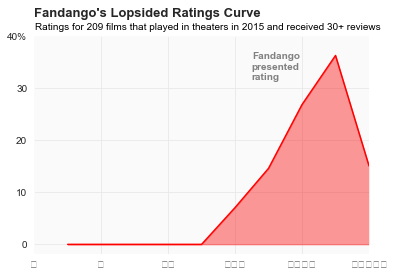

In [326]:
sns.set_style("darkgrid", {"axes.facecolor": "0.98", 'grid.color': '.91'})

ax = sns.lineplot(bystars['STARS'], bystars['PROPORTION'], data = bystars, color = 'r')
plt.fill_between(bystars.STARS.values, bystars.PROPORTION.values, color = 'r', alpha = 0.4)
ax.set_xlim([0,5])
plt.yticks(np.arange(0, 0.5, 0.1), [0, 10, 20, 30, '40%'])
plt.xticks(np.arange(0,6,1), ["☆", '★', "★★", "★★★", "★★★★", "★★★★★"])
plt.title("Fandango's Lopsided Ratings Curve\n", y = 1, loc = 'left', fontsize = 13, fontweight = 'bold')
plt.title("Ratings for 209 films that played in theaters in 2015 and received 30+ reviews", x = 0.52,y = 1, color='black', fontsize = 10)

ax.set_ylabel('')    
ax.set_xlabel('')  

ax.annotate('Fandango\npresented\nrating', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.65, 0.80), weight = 'bold', color = 'gray')

plt.show()

## 2-2

In [40]:
fandango_compare = pd.read_csv("C:\\Users\\rtg90\Desktop\\fandango_score_comparison.csv")

In [124]:
'''
fandango_compare_edit = fandango_compare.copy()
search1 = []
for value in fandango_compare['FILM']:
    init_index = value.find('(')
    if (value[init_index+1] in ['1','2','3','4','5','6','7','8','9','0']) and (len(value) == init_index+6):
        #print(len(value), " ", init_index, " ", init_index+5)
        yr = int(value[init_index+1:init_index+5])
    search1.append(yr)

fandango_compare_edit['year'] = search1
'''

'\nfandango_compare_edit = fandango_compare.copy()\nsearch1 = []\nfor value in fandango_compare[\'FILM\']:\n    init_index = value.find(\'(\')\n    if (value[init_index+1] in [\'1\',\'2\',\'3\',\'4\',\'5\',\'6\',\'7\',\'8\',\'9\',\'0\']) and (len(value) == init_index+6):\n        #print(len(value), " ", init_index, " ", init_index+5)\n        yr = int(value[init_index+1:init_index+5])\n    search1.append(yr)\n\nfandango_compare_edit[\'year\'] = search1\n'

In [125]:
'''
fandango_compare_edit = fandango_compare_edit[(fandango_compare_edit.year == 2015) & (fandango_compare_edit.Fandango_votes >= 30)]

col_list = ["Fandango_Ratingvalue", "IMDB_norm", "Metacritic_user_nom", "RT_user_norm", "Metacritic_norm", "RT_norm"]
label_list = ["Fandango", "IMDb users", "Metacritic users", "Rotten Tomatoes users", "Metacritic", "Rotten Tomatoes"]
for col in col_list:
    if col == "Fandango_Ratingvalue":
        ax = sns.kdeplot(fandango_compare_edit[col], shade=True, color = 'r')
        #ax.annotate(col, xy = (1,1), xytext=(0.8, 0.95), arrowprops=dict(facecolor='black', shrink=0.05), textcoords='axes fraction')
    else:
        ax = sns.kdeplot(fandango_compare_edit[col], shade=True)
        #ax.annotate(col, xy = (3,1), xytext=(0.8, 0.95))

ax.set_xlim([0,5])
plt.yticks(np.arange(0, 0.5, 0.1), [0, 10, 20, 30, '40%'])
plt.xticks(np.arange(0,6,1), ["☆", '★', "★★", "★★★", "★★★★", "★★★★★"])
plt.grid(color='gray', linestyle='-', linewidth=0.1)
plt.title("Fandango LOVES movies", fontweight="bold", fontsize = 20)

leg = ax.legend(labels = label_list)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
    
plt.show()
'''

'\nfandango_compare_edit = fandango_compare_edit[(fandango_compare_edit.year == 2015) & (fandango_compare_edit.Fandango_votes >= 30)]\n\ncol_list = ["Fandango_Ratingvalue", "IMDB_norm", "Metacritic_user_nom", "RT_user_norm", "Metacritic_norm", "RT_norm"]\nlabel_list = ["Fandango", "IMDb users", "Metacritic users", "Rotten Tomatoes users", "Metacritic", "Rotten Tomatoes"]\nfor col in col_list:\n    if col == "Fandango_Ratingvalue":\n        ax = sns.kdeplot(fandango_compare_edit[col], shade=True, color = \'r\')\n        #ax.annotate(col, xy = (1,1), xytext=(0.8, 0.95), arrowprops=dict(facecolor=\'black\', shrink=0.05), textcoords=\'axes fraction\')\n    else:\n        ax = sns.kdeplot(fandango_compare_edit[col], shade=True)\n        #ax.annotate(col, xy = (3,1), xytext=(0.8, 0.95))\n\nax.set_xlim([0,5])\nplt.yticks(np.arange(0, 0.5, 0.1), [0, 10, 20, 30, \'40%\'])\nplt.xticks(np.arange(0,6,1), ["☆", \'★\', "★★", "★★★", "★★★★", "★★★★★"])\nplt.grid(color=\'gray\', linestyle=\'-\', linewid

In [126]:
fandango_compare_edit = fandango_compare_edit[(fandango_compare_edit.year == 2015) & (fandango_compare_edit.Fandango_votes >= 30)]
imdb_users = fandango_compare_edit.groupby("IMDB_norm_round").count()
imdb_users = imdb_users.reset_index()
imdb_users['PROPORTION'] = imdb_users['IMDB_norm'] / sum(imdb_users.FILM)
imdb_users = imdb_users.sort_values(['IMDB_norm_round'])

metacritic_users = fandango_compare_edit.groupby("Metacritic_user_norm_round").count()
metacritic_users = metacritic_users.reset_index()
metacritic_users['PROPORTION'] = metacritic_users['Metacritic_user_nom'] / sum(metacritic_users.FILM)
metacritic_users = metacritic_users.sort_values(['Metacritic_user_norm_round'])


rotten_users = fandango_compare_edit.groupby("RT_user_norm_round").count()
rotten_users = rotten_users.reset_index()
rotten_users['PROPORTION'] = rotten_users['RT_user_norm'] / sum(rotten_users.FILM)
rotten_users = rotten_users.sort_values(['RT_user_norm_round'])

metacritic = fandango_compare_edit.groupby("Metacritic_norm_round").count()
metacritic = metacritic.reset_index()
metacritic['PROPORTION'] = metacritic['Metacritic_norm'] / sum(metacritic.FILM)
metacritic = metacritic.sort_values(['Metacritic_norm_round'])

rotten = fandango_compare_edit.groupby("RT_norm_round").count()
rotten = rotten.reset_index()
rotten['PROPORTION'] = rotten['RT_norm'] / sum(rotten.FILM)
rotten = rotten.sort_values(['RT_norm_round'])



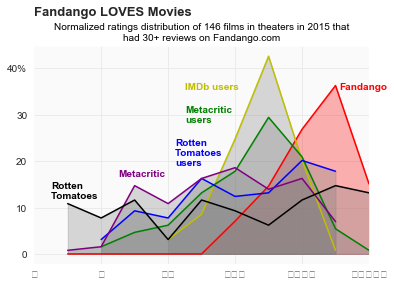

In [340]:
ax = sns.lineplot(bystars['STARS'], bystars['PROPORTION'], data = bystars, color = 'r')
ax = sns.lineplot(imdb_users['IMDB_norm_round'], imdb_users['PROPORTION'], data = imdb_users, color = 'y')
ax = sns.lineplot(metacritic_users['Metacritic_user_norm_round'], metacritic_users['PROPORTION'], data = metacritic_users, color = 'green')
ax = sns.lineplot(rotten_users['RT_user_norm_round'], rotten_users['PROPORTION'], data = rotten_users, color = 'blue')
ax = sns.lineplot(metacritic['Metacritic_norm_round'], metacritic['PROPORTION'], data = metacritic, color = 'purple')
ax = sns.lineplot(rotten['RT_norm_round'], rotten['PROPORTION'], data = rotten, color = 'black')

plt.fill_between(bystars.STARS.values, bystars.PROPORTION.values, color = 'r', alpha = 0.3)
plt.fill_between(imdb_users.IMDB_norm_round.values, imdb_users.PROPORTION.values, color = 'gray', alpha = 0.3)
plt.fill_between(metacritic_users.Metacritic_user_norm_round.values, metacritic_users.PROPORTION.values, color = 'gray', alpha = 0.3)
plt.fill_between(rotten_users.RT_user_norm_round.values, rotten_users.PROPORTION.values, color = 'gray', alpha = 0.3)
plt.fill_between(metacritic.Metacritic_norm_round.values, metacritic.PROPORTION.values, color = 'gray', alpha = 0.3)
plt.fill_between(rotten.RT_norm_round.values, rotten.PROPORTION.values, color = 'gray', alpha = 0.3)

ax.set_xlim([0,5])
plt.yticks(np.arange(0, 0.5, 0.1), [0, 10, 20, 30, '40%'])
plt.xticks(np.arange(0,6,1), ["☆", '★', "★★", "★★★", "★★★★", "★★★★★"])

ax.set_ylabel('')    
ax.set_xlabel('')  

plt.title("Fandango LOVES Movies\n", y = 1.05, loc = 'left', fontsize = 13, fontweight = 'bold')
plt.title("Normalized ratings distribution of 146 films in theaters in 2015 that\nhad 30+ reviews on Fandango.com",y = 1, color='black', fontsize = 10)

#plt.title("Who Got To Be On 'The Daily Show'?\n", y = 1, loc = 'left', fontsize = 13, fontweight = 'bold')
#plt.title("Occupation of guests, by year", x = 0.2 ,y = 1, color='black', fontsize = 10)


ax.annotate('Fandango', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.91, 0.80), weight = 'bold', color = 'r')
ax.annotate('IMDb users', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.45, 0.80), weight = 'bold', color = 'y')
ax.annotate('Metacritic\nusers', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.45, 0.65), weight = 'bold', color = 'green')
ax.annotate('Rotten\nTomatoes\nusers', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.42, 0.45), weight = 'bold', color = 'blue')
ax.annotate('Metacritic', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.25, 0.40), weight = 'bold', color = 'purple')
ax.annotate('Rotten\nTomatoes', xy=(3.5, 0.3), textcoords='axes fraction', xytext=(0.05, 0.30), weight = 'bold', color = 'black')

plt.show()

# 3

In [129]:
show = pd.read_csv("C:\\Users\\rtg90\Desktop\\daily_show_guests.csv")

In [327]:
acm = show[(show.Group == 'Comedy') | (show.Group == 'Musician') | (show.Group == 'Acting')]
byyear_acm = acm.groupby('YEAR').count()
byyear_acm['total_guest'] = show.groupby('YEAR').count()['Group']
byyear_acm['Proportion'] = byyear_acm["Group"] / byyear_acm['total_guest']
byyear_acm = byyear_acm.reset_index()

media = show[show.Group == 'Media']
byyear_media = media.groupby('YEAR').count()
byyear_media['total_guest'] = show.groupby('YEAR').count()['Group']
byyear_media['Proportion'] = byyear_media["Group"] / byyear_media['total_guest']
byyear_media = byyear_media.reset_index()

govpol = show[(show.Group == 'Government') | (show.Group == 'Politician') | (show.Group == 'Political Aide')]
byyear_govpol = govpol.groupby('YEAR').count()
byyear_govpol['total_guest'] = show.groupby('YEAR').count()['Group']
byyear_govpol['Proportion'] = byyear_govpol["Group"] / byyear_govpol['total_guest']
byyear_govpol = byyear_govpol.reset_index()


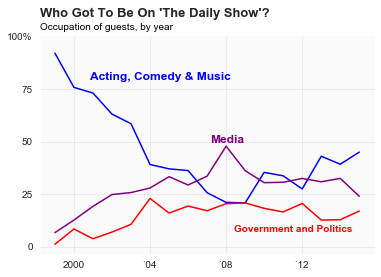

In [328]:
ax = sns.lineplot(byyear_acm['YEAR'], byyear_acm['Proportion'], data = byyear_acm, color = 'blue')
ax = sns.lineplot(byyear_media['YEAR'], byyear_media['Proportion'], data = byyear_media, color = 'purple')
ax = sns.lineplot(byyear_govpol['YEAR'], byyear_govpol['Proportion'], data = byyear_govpol, color = 'r')


plt.yticks(np.arange(0, 1.01, 0.25), [0, 25, 50, 75, '100%'])
plt.xticks(np.arange(2000, 2013, 4), [2000, '`04', '`08', '`12'])

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title("Who Got To Be On 'The Daily Show'?\n", y = 1, loc = 'left', fontsize = 13, fontweight = 'bold')
plt.title("Occupation of guests, by year", x = 0.2 ,y = 1, color='black', fontsize = 10)

ax.annotate('Media', xy=(3.0, 1.0),  xycoords='axes fraction',xytext=(0.51, 0.51), weight = 'bold', color = 'purple', size = 12)
ax.annotate('Acting, Comedy & Music', xy=(3.0, 1.0), xycoords='axes fraction', xytext=(0.15, 0.80), weight = 'bold', color = 'blue', size = 12)
ax.annotate('Government and Politics', xy=(3.0, 1.0), xycoords='axes fraction', xytext=(0.58, 0.10), weight = 'bold', color = 'r')

plt.show()